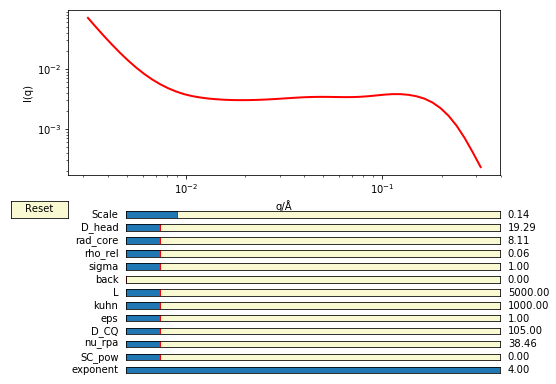

In [1]:
from WLM_models.SAXS_FF_ipython import WLM_whole_q
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button


# Initial parameters.
scale = 0.1440E+00  # 0.1
d_head = 0.1929E+02  # 20
rad_core = 0.8109E+01  # 8
rho_rel = 0.5999E-01  # 0.06
sigma = 0.1000E+01  # 1
back = 0.0  # 0
L = 0.5000E+04  # 5000
kuhn = 0.1000E+04  # 1000
eps = 0.1000E+01  # 1
D_CQ = 0.1050E+03  # 105
nu_rpa = 0.3846E+02  # 38
SC_pow = 0.6757E-03  # 0.000
exponent = 4

figure_bottom = 0.50

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.15, bottom=figure_bottom)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('q/Å')
ax.set_ylabel('I(q)')
qs = np.logspace(-2.5, -0.5)
Ints = WLM_whole_q(qs, scale, d_head, rad_core, rho_rel, sigma, back, L, kuhn, eps, D_CQ, nu_rpa, SC_pow, exponent)

[line] = ax.plot(qs, Ints, linewidth=2, color='red')

axis_color = 'lightgoldenrodyellow'

first_slider_bottom = figure_bottom - 0.1
slider_bottoms = [first_slider_bottom - (i - 1) * 0.03 for i in range(1, 14, 1)]

slider_height = 0.015
slider_left = 0.25
slider_width = 0.65


# add_axes([left, bottom, width, height])
# Slider(ax, label, valmin, valmax, valinit)

scale_slider_ax = fig.add_axes([slider_left, slider_bottoms[0], slider_width, slider_height], facecolor=axis_color)
scale_slider = Slider(scale_slider_ax, 'Scale', 0.01, 1, valinit=scale)

d_head_slider_ax = fig.add_axes([slider_left, slider_bottoms[1], slider_width, slider_height], facecolor=axis_color)
d_head_slider = Slider(d_head_slider_ax, 'D_head', d_head / 10, d_head * 10, valinit=d_head)

rad_core_slider_ax = fig.add_axes([slider_left, slider_bottoms[2], slider_width, slider_height], facecolor=axis_color)
rad_core_slider = Slider(rad_core_slider_ax, 'rad_core', rad_core / 10, rad_core * 10, valinit=rad_core)

rho_rel_slider_ax = fig.add_axes([slider_left, slider_bottoms[3], slider_width, slider_height], facecolor=axis_color)
rho_rel_slider = Slider(rho_rel_slider_ax, 'rho_rel', rho_rel / 10, rho_rel * 10, valinit=rho_rel)

sigma_slider_ax = fig.add_axes([slider_left, slider_bottoms[4], slider_width, slider_height], facecolor=axis_color)
sigma_slider = Slider(sigma_slider_ax, 'sigma', sigma / 10, sigma * 10, valinit=sigma)

back_slider_ax = fig.add_axes([slider_left, slider_bottoms[5], slider_width, slider_height], facecolor=axis_color)
back_slider = Slider(back_slider_ax, 'back', 0, 0.01, valinit=back)

L_slider_ax = fig.add_axes([slider_left, slider_bottoms[6], slider_width, slider_height], facecolor=axis_color)
L_slider = Slider(L_slider_ax, 'L', L / 10, L * 10, valinit=L)

kuhn_slider_ax = fig.add_axes([slider_left, slider_bottoms[7], slider_width, slider_height], facecolor=axis_color)
kuhn_slider = Slider(kuhn_slider_ax, 'kuhn', kuhn / 10, kuhn * 10, valinit=kuhn)

eps_slider_ax = fig.add_axes([slider_left, slider_bottoms[8], slider_width, slider_height], facecolor=axis_color)
eps_slider = Slider(eps_slider_ax, 'eps', eps / 10, eps * 10, valinit=eps)

D_CQ_slider_ax = fig.add_axes([slider_left, slider_bottoms[9], slider_width, slider_height], facecolor=axis_color)
D_CQ_slider = Slider(D_CQ_slider_ax, 'D_CQ', D_CQ / 10, D_CQ * 10, valinit=D_CQ)

nu_rpa_slider_ax = fig.add_axes([slider_left, slider_bottoms[10], slider_width, slider_height], facecolor=axis_color)
nu_rpa_slider = Slider(nu_rpa_slider_ax, 'nu_rpa', nu_rpa / 10, nu_rpa * 10, valinit=nu_rpa)

SC_pow_slider_ax = fig.add_axes([slider_left, slider_bottoms[11], slider_width, slider_height], facecolor=axis_color)
SC_pow_slider = Slider(SC_pow_slider_ax, 'SC_pow', SC_pow / 10, SC_pow * 10, valinit=SC_pow)

exponent_slider_ax = fig.add_axes([slider_left, slider_bottoms[12], slider_width, slider_height], facecolor=axis_color)
exponent_slider = Slider(exponent_slider_ax, 'exponent', 0, 4, valinit=exponent)

def sliders_on_changed(val):
    line.set_ydata(WLM_whole_q(qs, scale_slider.val, d_head_slider.val, rad_core_slider.val, rho_rel_slider.val,
                               sigma_slider.val, back_slider.val, L_slider.val, kuhn_slider.val, eps_slider.val,
                               D_CQ_slider.val, nu_rpa_slider.val, SC_pow_slider.val, exponent_slider.val))
    fig.canvas.draw_idle()


scale_slider.on_changed(sliders_on_changed)
d_head_slider.on_changed(sliders_on_changed)
rad_core_slider.on_changed(sliders_on_changed)
rho_rel_slider.on_changed(sliders_on_changed)
sigma_slider.on_changed(sliders_on_changed)
back_slider.on_changed(sliders_on_changed)
L_slider.on_changed(sliders_on_changed)
kuhn_slider.on_changed(sliders_on_changed)
eps_slider.on_changed(sliders_on_changed)
D_CQ_slider.on_changed(sliders_on_changed)
nu_rpa_slider.on_changed(sliders_on_changed)
SC_pow_slider.on_changed(sliders_on_changed)
exponent_slider.on_changed(sliders_on_changed)


reset_button_ax = fig.add_axes([0.05, 0.4, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

def reset_button_on_clicked(mouse_event):
    scale_slider.reset()
    d_head_slider.reset()
    rad_core_slider.reset()
    rho_rel_slider.reset()
    sigma_slider.reset()
    back_slider.reset()
    L_slider.reset()
    kuhn_slider.reset()
    eps_slider.reset()
    D_CQ_slider.reset()
    nu_rpa_slider.reset()
    SC_pow_slider.reset()
    exponent_slider.reset()

reset_button.on_clicked(reset_button_on_clicked)
plt.show()
